# **ANN**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/umbertogriffo/Fashion-mnist-cnn-keras/refs/heads/master/Dataset/fashion-mnist_test.csv")

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape 

(10000, 785)

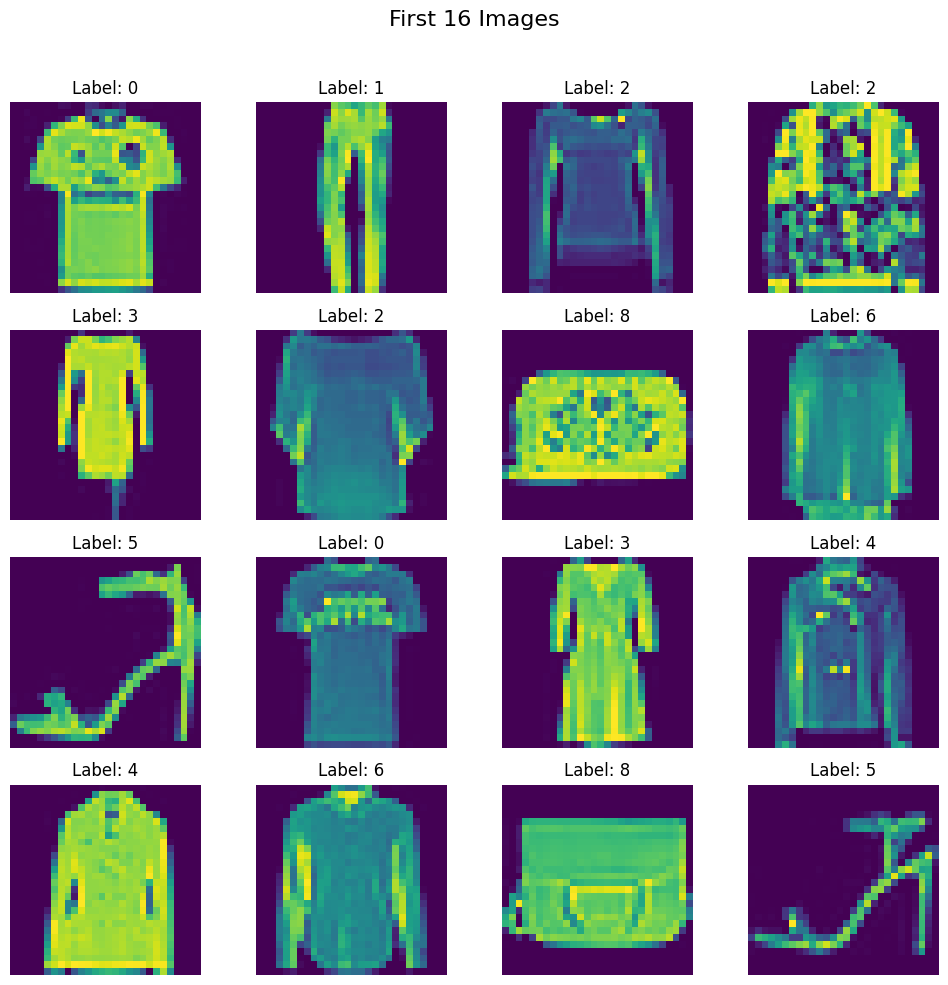

In [6]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [7]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [8]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.45098039, 0.1372549 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(8000, 784))

In [12]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [13]:
# create train_dataset object
train_dataset = CustomDataset(X_train, y_train)
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [14]:
# create test_dataset object
test_dataset = CustomDataset(X_test, y_test)
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0078,
         0.0000, 0.0000, 0.2980, 0.3137, 0.3451, 0.4118, 0.3451, 0.3373, 0.3059,
         0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.6235, 0.5686, 0.5490, 0.4549, 0.0863, 0.4431, 0.5216,
         0.5686, 0.6157, 0.0039, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1765, 0.4902, 0.5490, 0.5098, 0.4549, 0.4314, 0.4784, 0.4549,
         0.4275, 0.5216, 0.5490, 0.4980, 0.1843, 0.0000, 0.0000, 0.0039, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3961, 0.5412, 0.5255, 0.5216, 0.5373, 0.4471, 0.4275, 0.4431,
         0.4353, 0.3961, 0.5412, 0.5255, 0.5255, 0.5412, 0.4078, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [15]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [16]:
# define NN class

class MyNN(nn.Module):
    def __init__(self, input_features:int, output_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=output_features)
        )
    
    def forward(self, x):
        return self.model(x)

In [17]:
epochs = 100
learning_rate = 0.1

In [18]:
model = MyNN(input_features=X_train.shape[1], output_features=10)

## Loss function
criterion = nn.CrossEntropyLoss()

## Optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [19]:
len(train_loader)

250

### **Training Loop**

In [20]:
for epoch in range(epochs):
    
    total_epoch_loss = 0

    for batch_features, batch_labels in train_loader:

        ## Forward pass
        outputs = model(batch_features)

        ## Calculate Loss
        loss = criterion(outputs, batch_labels)


        ## Backward pass
        optimizer.zero_grad()
        loss.backward()

        ## Update grad
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()
    
    avg_loss = total_epoch_loss / len(train_loader)

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch: {epoch + 1}, Loss: {avg_loss}')

Epoch: 1, Loss: 1.100093952178955
Epoch: 10, Loss: 0.3600860167890787
Epoch: 20, Loss: 0.2554359982311726
Epoch: 30, Loss: 0.1791731402128935
Epoch: 40, Loss: 0.13432760774344205
Epoch: 50, Loss: 0.10123092741635628
Epoch: 60, Loss: 0.07928729473706335
Epoch: 70, Loss: 0.06305528791376855
Epoch: 80, Loss: 0.040288077210076156
Epoch: 90, Loss: 0.052849587381933814
Epoch: 100, Loss: 0.015047413977285031


In [21]:
## set model in eval model

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [22]:
total = 0 
correct = 0

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        total = total + batch_labels.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)


0.8555
